# Aula 7 - *Introdução a ciências de dados_Parte 2 (Iris Dataset)*
### [Bernardo Halfeld](https://github.com/BernardoHalfeld) - 202004705

---

# 1. Bibliotecas Utilizadas

* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [Numpy](https://numpy.org/)
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)

---

# 2. Importando as bibliotecas

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

print('Bibliotecas importadas!')

Bibliotecas importadas!


---

# 3. Carregando e exibindo os dados

In [15]:
df_dataset = pd.read_csv('https://raw.githubusercontent.com/BernardoHalfeld/lia1-2023-1-Professor-/main/Aula%2007%20-%20Introdu%C3%A7%C3%A3o%20%C3%A0%20Ci%C3%AAncia%20de%20Dados%20-%20Iris%20Dataset/iris.csv', sep = ',', index_col = None)
print('Dados importados!')

Dados importados!


In [16]:
display(df_dataset)

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
...,...,...,...,...,...,...,...
147,145,6.7,3.0,5.2,2.3,São Paulo,Iris-virginica
148,146,6.3,2.5,5.0,1.9,Campinas,Iris-virginica
149,147,6.5,3.0,5.2,2.0,Sorocaba,Iris-virginica
150,148,6.2,3.4,5.4,2.3,Sorocaba,Iris-virginica


---
* Iris Setosa
<img src = "iris_setosa.jpeg" width = "400" height = "400">

---
* Iris Versicolour
<img src = "iris_versicolour.jpeg" width = "400" height = "400">

---
* Iris Virginica
<img src = "iris_virginica.jpeg" width = "400" height = "400">

--- 

# 4. Pré-processamento dos dados

### 4.1 Eliminação de atributos irrelevantes

In [4]:
#Remove colunas "irrelevantes"
df_dataset = df_dataset.drop(columns=['id_planta', 'cidade_origem'])

display(df_dataset.head())

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---
### 4.2 Tratamento de valores nulos

In [14]:
#verifica valores ausentes (NaN)
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

display(df_dataset.iloc[idxRowNan])

C:\Users\nebia\AppData\Local\Temp\ipykernel_10044\3267248859.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
30,4.8,3.1,NaN,0.2,Iris-setosa


In [6]:
#Preenche os valores NaN com a média dos respectivos valores (da própria categoria)
def trataFaltantes(df_dataset):
    
    #seleciona as linhas onde não contém valor nulo
    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]
    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_sepala']), :]
    
    #calcula a média dos valores não nulos
    media_ls = notNull_ls[ notNull_ls['classe'] == 'Iris-setosa']['largura_sepala'].mean()
    media_cp = notNull_cp[ notNull_cp['classe'] == 'Iris-setosa']['comprimento_sepala'].mean()
    
    #substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls
    df_dataset.loc[ pd.isnull(df_dataset['comprimento_sepala']), 'comprimento_sepala'] = media_cp
    
    return df_dataset

trataFaltantes(df_dataset)

print('\nObjeto(s) com valor(es) nulo(s):')
display(df_dataset.iloc[idxRowNan])


Objeto(s) com valor(es) nulo(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.7,0.5,Iris-setosa
24,4.8,3.416667,1.9,0.2,Iris-setosa
30,4.8,3.100000,NaN,0.2,Iris-setosa


---
### 4.3 Tratamento de dados redundantes ou inconsistentes

In [7]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala'], keep = False)]

#se houver redundância vai imprimir os objetos em questão
if len(df_duplicates) > 0:
    print('\nObjeto(s) redundantes(s) e ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não há valores redundantes')


Objeto(s) redundantes(s) e ou inconsistente(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
#Elimina os objetos duplicados, caso houver
def delDuplicatas(df_dataset):
    df_dataset = df_dataset.drop_duplicates(keep = 'first')
    
    return df_dataset

df_dataset = delDuplicatas(df_dataset)
display(df_dataset)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
147,6.7,3.0,5.2,2.3,Iris-virginica
148,6.3,2.5,5.0,1.9,Iris-virginica
149,6.5,3.0,5.2,2.0,Iris-virginica
150,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# Verifica se a inconsistenência
df_duplicates = df_dataset[ df_dataset.duplicated(subset = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala'], keep = False)]

if len(df_duplicates) > 0:
    print('\nObjeto(s) inconsistente(s):')
    display(df_duplicates)
else:
    print('Não há inconsistência')


Objeto(s) inconsistente(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor


In [10]:
#eliminando ambos os objetos inconsistentes
def delInconsistencias(df_dataset):
    df_dataset = df_dataset.drop_duplicates(subset = ['comprimento_sepala','largura_sepala', 'comprimento_petala', 'largura_sepala'], keep = False)
    return df_dataset

df_dataset = delInconsistencias(df_dataset)
#Testando
df_duplicates = df_dataset[df_dataset.duplicated(subset = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_sepala'], keep = False)]

if len(df_duplicates) > 0:
    print('\nAinda há inconsistência ou redundância em algum dos objetos')
    display(df_duplicates)
else:
    print('Não há redundância ou inconsistência')
    

Não há redundância ou inconsistência


---
# 5. Análise de dados

In [11]:
#Estatísticas matemática dos dados
df_detalhes = df_dataset.describe()
display(df_detalhes)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,138.000000,138.000000,137.000000,138.000000
mean,5.970290,3.192995,3.828467,1.215217
std,1.522743,1.763223,1.724390,0.738404
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,20.900000,23.100000,6.900000,2.500000


---
### 5.1 Detecção e remoção de outliers (valores atípicos)

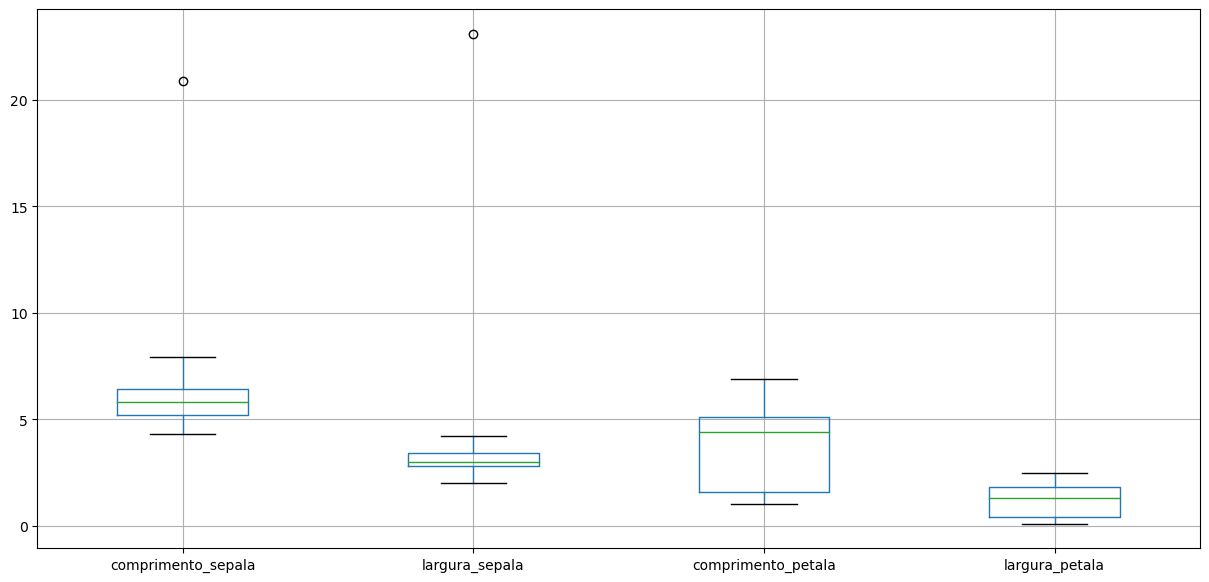

In [12]:
df_dataset.boxplot(figsize = (15,7))
plt.show()

In [13]:
#remoção dos outliers
def removeOutliers(df_dataset):

    for atributo in df_dataset.columns[:-1]:
        #terceciro e primeiro quartil
        q75, q25 = np.percentile(df_dataset[atributo].values, [75,25])
        #IQR
        IQR = q75 - q25
        #identificando os outliers com base no IQR
        df_dataset = df_dataset[(df_dataset[atributo] <= (q75+1.5*IQR)) & (df_dataset[atributo] >= (q25-1.5*IQR))]
        
    return df_dataset

#remove os outliers
df_dataset = removeOutliers(df_dataset)

#novo gráfico
df_dataset.boxplot(figsize = (15,7))
plt.show()

IndexError: cannot do a non-empty take from an empty axes.